In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn import metrics

from sklearn import preprocessing

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
dataset = pd.read_csv('./datasets/train.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Brewe, Dr. Arthur Jackson",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
dataset.shape

(891, 12)

In [5]:
dataset.isnull().sum(axis=0)    #看有哪些字段是空的

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

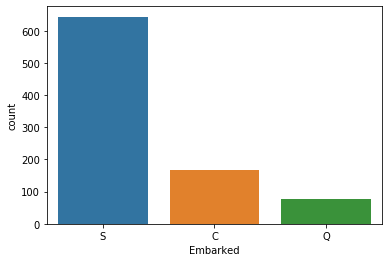

In [6]:
sns.countplot(dataset['Embarked'])

In [7]:
dataset = dataset.fillna({"Embarked": "S"})   #将空缺的Embarked设置成‘S’

In [8]:
dataset = pd.get_dummies(dataset, columns=['Sex'])    #One Hot
dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1


In [9]:
dataset = pd.get_dummies(dataset, columns=['Embarked'])     #One Hot
dataset.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


In [10]:
#结果集为Survived
train_class = dataset[['Survived']]
#训练集
train_feature = dataset[['Pclass', 'Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Parch', 'SibSp', 'Fare']]
train_feature.head()

,Pclass,Sex_male,Sex_female,Embarked_C,Embarked_Q,Embarked_S,Parch,SibSp,Fare
0,3,1,0,0,0,1,0,1,7.2500
1,1,0,1,1,0,0,0,1,71.2833
2,3,0,1,0,0,1,0,0,7.9250
3,1,0,1,0,0,1,0,1,53.1000
4,3,1,0,0,0,1,0,0,8.0500


In [11]:
clf = DecisionTreeClassifier(random_state=0)
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
#交叉验证，返回10个模型
scores = cross_validate(clf, train_feature, train_class, cv=10, scoring=scoring)
# print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())           #分类准确度
print ('Precisoin score : %.3f' % scores['test_prec_macro'].mean())   #精准率
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())       #召回率
print ('F1 score : %.3f' % scores['test_f1_macro'].mean())            #F1 Score

Accuracy score : 0.804
Precisoin score : 0.797
Recall score : 0.785
F1 score : 0.789


In [12]:
para_grid = {
    'min_samples_split' : range(10,500,20),
    'max_depth': range(1,20,2),
    'criterion': ("gini", "entropy")
}

clf_tree = DecisionTreeClassifier()
clf = GridSearchCV(clf_tree,
                   para_grid,
                   scoring='accuracy',
                   cv=5,
                   n_jobs=-1)
clf.fit(train_feature,train_class)

best_parameters = clf.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 30}


In [13]:
clf = clf.best_estimator_
scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro',
           'f1_macro': 'f1_macro'}
#使用网格搜索出来的模型交叉验证
scores = cross_validate(clf, train_feature, train_class, cv=10, scoring=scoring)
#print(scores.keys())

print ('Accuracy score : %.3f' % scores['test_acc'].mean())
print ('Precisoin score : %.3f' % scores['test_prec_macro'].mean())
print ('Recall score : %.3f' % scores['test_rec_macro'].mean())
print ('F1 score score : %.3f' % scores['test_f1_macro'].mean())

Accuracy score : 0.795
Precisoin score : 0.793
Recall score : 0.767
F1 score score : 0.774


NameError: name 'feat_names' is not defined

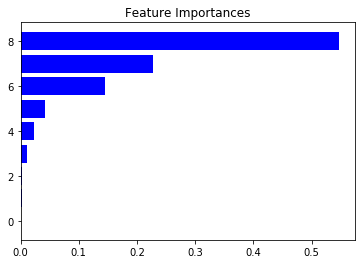

In [14]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [15]:
# Loading test dataset
test = pd.read_csv('./datasets/test.csv')
test.isnull().sum(axis=0)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
# Fit the model
clf.fit(train_feature, train_class)

# Replace missing Fare values with mean
meanFare = dataset['Fare'].mean()
test = test.fillna({"Fare": meanFare})

# Categorical -> One hot encoding
test = pd.get_dummies(test, columns=['Sex'])
test = pd.get_dummies(test, columns=['Embarked'])

#set ids as PassengerId and predict survival
ids = test['PassengerId']
test_feature = test[['Pclass', 'Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Parch', 'SibSp', 'Fare']]
predictions = clf.predict(test_feature)

#set the output as a dataframe and convert to csv file named submission.csv
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [17]:
output.to_csv('submission.csv', index=False)